In [10]:
import pandas as pd
from textblob import TextBlob

In [17]:
df = pd.read_csv("../data/sp500_headlines.csv")
print(df.head())

                                               Title        Date       CP
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16
1  Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16
2                   2008 predictions for the S&P 500  2008-01-02  1447.16
3  U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16
4  U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18


In [22]:
# Computing sentiment polarity
df['sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate sentiment by day
daily_sentiment = df.groupby('Date')['sentiment'].mean().reset_index()

print(df.head())

                                               Title        Date       CP  \
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16   
1  Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16   
2                   2008 predictions for the S&P 500  2008-01-02  1447.16   
3  U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16   
4  U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   

   sentiment  
0      0.000  
1      0.000  
2      0.000  
3      0.225  
4      0.500  


In [38]:
# Aggregate sentiment by day
daily_sentiment = df.groupby('Date').agg({'sentiment': 'mean', 'CP':'first'}).reset_index()

# Whether today's sentiment predicts tomorrow's values
daily_sentiment['sentiment_shifted'] = daily_sentiment['sentiment'].shift(1)

# Daily returns - % change in price from previous day
daily_sentiment['return'] = daily_sentiment['CP'].pct_change()

print(daily_sentiment.head())

         Date  sentiment       CP  sentiment_shifted    return
0  2008-01-02      0.000  1447.16                NaN       NaN
1  2008-01-03      0.225  1447.16              0.000  0.000000
2  2008-01-07      0.500  1416.18              0.225 -0.021407
3  2008-01-09      0.000  1409.13              0.500 -0.004978
4  2008-01-10      0.075  1420.33              0.000  0.007948


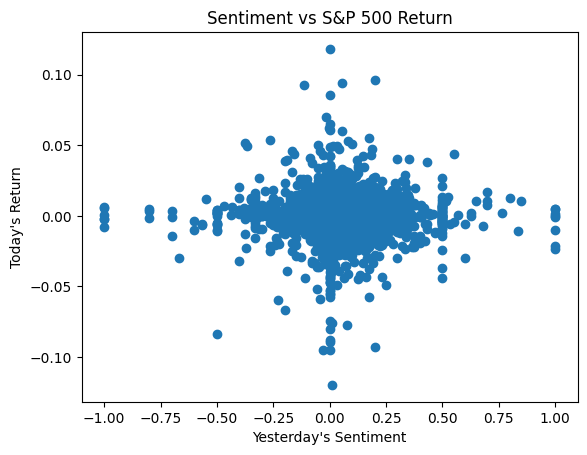

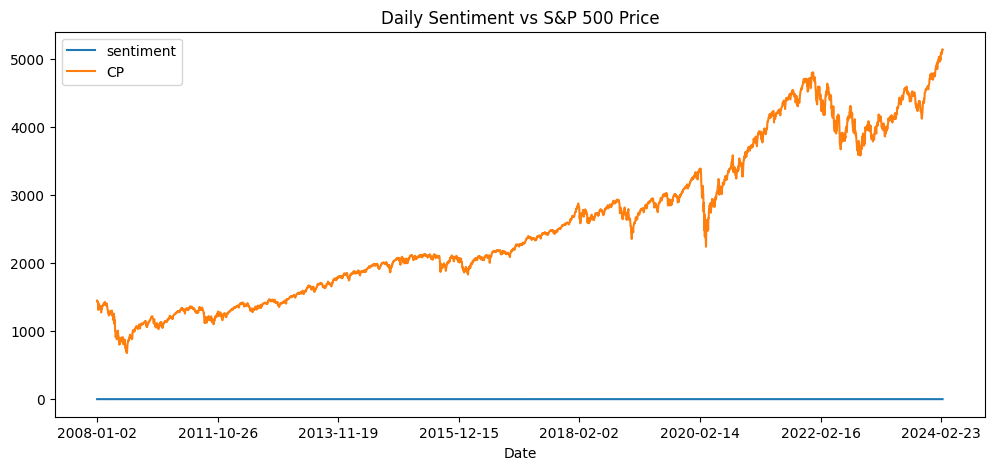

In [39]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(daily_sentiment['sentiment_shifted'], daily_sentiment['return'])
plt.xlabel("Yesterday's Sentiment")
plt.ylabel("Today's Return")
plt.title("Sentiment vs S&P 500 Return")
plt.show()

# Time series
daily_sentiment.set_index('Date')[['sentiment', 'CP']].plot(figsize=(12,5))
plt.title("Daily Sentiment vs S&P 500 Price")
plt.show()
